In [42]:
!pip install alpha_vantage
import pandas as pd
import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries
import io
import requests


In [79]:
df_confirmed = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv", header=0)
x = df_confirmed

In [80]:
df_deaths = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv", header=0)
y = df_deaths

In [48]:
df_confirmed.rename({'4/25/22': 'Confirmed Cases'}, axis=1, inplace=True)
df_deaths.rename({'4/25/22': 'Deaths'}, axis=1, inplace=True)

In [49]:
df_com=df_confirmed.set_index('Country/Region').join(df_deaths.set_index('Country/Region'), lsuffix='_x', rsuffix='_y')
display(df_com)

,Province/State_x,Lat_x,Long_x,1/22/20_x,1/23/20_x,1/24/20_x,1/25/20_x,1/26/20_x,1/27/20_x,1/28/20_x,...,4/16/22_y,4/17/22_y,4/18/22_y,4/19/22_y,4/20/22_y,4/21/22_y,4/22/22_y,4/23/22_y,4/24/22_y,Deaths
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,33.939110,67.709953,0,0,0,0,0,0,0,...,7676,7678,7679,7680,7680,7680,7680,7681,7682,7683
Albania,NaN,41.153300,20.168300,0,0,0,0,0,0,0,...,3496,3496,3496,3496,3496,3496,3496,3496,3496,3496
Algeria,NaN,28.033900,1.659600,0,0,0,0,0,0,0,...,6874,6874,6874,6874,6874,6874,6874,6874,6875,6875
Andorra,NaN,42.506300,1.521800,0,0,0,0,0,0,0,...,153,153,153,153,153,153,153,153,153,153
Angola,NaN,-11.202700,17.873900,0,0,0,0,0,0,0,...,1900,1900,1900,1900,1900,1900,1900,1900,1900,1900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,NaN,31.952200,35.233200,0,0,0,0,0,0,0,...,5656,5656,5656,5657,5657,5657,5657,5657,5657,5657
Winter Olympics 2022,NaN,39.904200,116.407400,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Yemen,NaN,15.552727,48.516388,0,0,0,0,0,0,0,...,2148,2148,2148,2148,2148,2148,2148,2148,2149,2149


In [50]:
db= df_com[['Lat_x', 'Long_x', 'Confirmed Cases', 'Deaths']]
db

,Lat_x,Long_x,Confirmed Cases,Deaths
Country/Region,,,,
Afghanistan,33.939110,67.709953,178745,7683
Albania,41.153300,20.168300,274828,3496
Algeria,28.033900,1.659600,265771,6875
Andorra,42.506300,1.521800,41013,153
Angola,-11.202700,17.873900,99287,1900
...,...,...,...,...
West Bank and Gaza,31.952200,35.233200,656876,5657
Winter Olympics 2022,39.904200,116.407400,535,0
Yemen,15.552727,48.516388,11818,2149


In [51]:
# checking for any null values in deaths and confirmed cases
db.isna().sum()

Lat_x              50
Long_x             50
Confirmed Cases     0
Deaths              0
dtype: int64

In [52]:
# 4. 
import json
key = 'LH1QNQRB8AUG767R'
url= 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=MSFT&apikey='+key
stock_price=requests.get(url)
data_stock_price=stock_price.json()
data_stock_price

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
  '2. Symbol': 'MSFT',
  '3. Last Refreshed': '2022-04-25',
  '4. Output Size': 'Compact',
  '5. Time Zone': 'US/Eastern'},
 'Time Series (Daily)': {'2022-04-25': {'1. open': '273.2900',
   '2. high': '281.1100',
   '3. low': '270.7700',
   '4. close': '280.7200',
   '5. volume': '35678852'},
  '2022-04-22': {'1. open': '281.6800',
   '2. high': '283.2000',
   '3. low': '273.3800',
   '4. close': '274.0300',
   '5. volume': '29405798'},
  '2022-04-21': {'1. open': '288.5800',
   '2. high': '293.3000',
   '3. low': '280.0600',
   '4. close': '280.8100',
   '5. volume': '29454587'},
  '2022-04-20': {'1. open': '289.4000',
   '2. high': '289.7000',
   '3. low': '285.3702',
   '4. close': '286.3600',
   '5. volume': '22805341'},
  '2022-04-19': {'1. open': '279.3800',
   '2. high': '286.1700',
   '3. low': '278.4100',
   '4. close': '285.3000',
   '5. volume': '22297720'},
  '2022-04-18': {'1. open': '278

In [53]:
import requests
ts= TimeSeries(key='RAC69BWCN5KL47KJ',output_format='pandas')
USA=ts.get_weekly_adjusted('PSA')
Canada=ts.get_weekly_adjusted('TSCO.LON')

In [54]:
df1=pd.DataFrame(USA[0])
df2=pd.DataFrame(Canada[0])
print(df1)
print(df2)

            1. open  2. high   3. low  4. close  5. adjusted close  6. volume  \
date                                                                            
2022-04-25   402.92   403.73  392.770    399.00           399.0000   933699.0   
2022-04-22   408.53   421.76  402.010    402.36           402.3600  2877349.0   
2022-04-14   409.36   411.67  398.815    408.50           408.5000  2331191.0   
2022-04-08   396.62   411.89  388.460    408.95           408.9500  3362675.0   
2022-04-01   376.62   400.45  376.060    396.51           396.5100  3729601.0   
...             ...      ...      ...       ...                ...        ...   
1999-12-10    22.56    22.75   22.000     22.00             9.7257  1464400.0   
1999-12-03    23.00    23.13   22.500     22.81            10.0838  1410700.0   
1999-11-26    23.88    23.88   23.060     23.13            10.2253   570800.0   
1999-11-19    23.19    24.13   22.940     24.13            10.6673  1087700.0   
1999-11-12    24.88    25.06

In [55]:
# high and low prices of stocks in USA by daily basis
df_USA_stocks=df1.drop(['1. open', '4. close','5. adjusted close','6. volume','7. dividend amount'], axis=1)
df_USA_stocks

,2. high,3. low
date,,
2022-04-25,403.73,392.770
2022-04-22,421.76,402.010
2022-04-14,411.67,398.815
2022-04-08,411.89,388.460
2022-04-01,400.45,376.060
...,...,...
1999-12-10,22.75,22.000
1999-12-03,23.13,22.500
1999-11-26,23.88,23.060


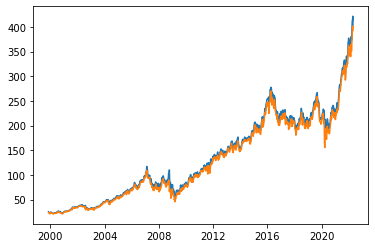

In [56]:
plt.plot(df_USA_stocks['2. high'])
plt.plot(df_USA_stocks['3. low'])

In [57]:
# high and low prices of stocks in Canada by daily basis
df_Canada_stocks=df2.drop(['1. open', '4. close','5. adjusted close','6. volume','7. dividend amount'], axis=1)
df_Canada_stocks

,2. high,3. low
date,,
2022-04-25,269.7000,260.3910
2022-04-22,271.9000,262.4000
2022-04-14,275.8000,251.6088
2022-04-08,283.4000,269.1000
2022-04-01,284.4325,276.0000
...,...,...
2005-02-11,316.5001,307.7501
2005-02-04,316.5001,307.0001
2005-01-28,312.5001,305.0001


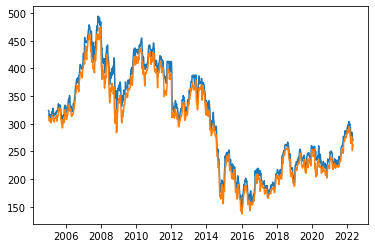

In [58]:
plt.plot(df_Canada_stocks['2. high'])
plt.plot(df_Canada_stocks['3. low'])

In [59]:
import requests
ts= TimeSeries(key='RAC69BWCN5KL47KJ',output_format='pandas')
USA_1=ts.get_weekly_adjusted('IBM')
Canada_2=ts.get_weekly_adjusted('TSCO.LON')

In [60]:
df3=pd.DataFrame(USA_1[0])
df4=pd.DataFrame(Canada_2[0])
print(df3)
print(df4)

            1. open  2. high  3. low  4. close  5. adjusted close   6. volume  \
date                                                                            
2022-04-25   137.59   139.65  135.19    139.10           139.1000   5748289.0   
2022-04-22   126.60   141.88  125.53    138.25           138.2500  47056765.0   
2022-04-14   127.95   130.58  124.91    126.56           126.5600  15342641.0   
2022-04-08   130.26   131.23  126.73    127.73           127.7300  16553021.0   
2022-04-01   130.82   133.08  128.06    130.15           130.1500  19183786.0   
...             ...      ...     ...       ...                ...         ...   
1999-12-10   113.00   122.12  107.56    109.00            62.3912  58626000.0   
1999-12-03   104.94   112.87  102.12    111.87            64.0340  37670000.0   
1999-11-26   105.50   109.87  101.81    105.00            60.1017  37165600.0   
1999-11-19    96.00   105.12   92.62    103.94            59.4949  61550800.0   
1999-11-12    90.50    97.50

In [61]:
df_USA_stocks=df3.drop(['1. open', '4. close','5. adjusted close','6. volume','7. dividend amount'], axis=1)
df_USA_stocks

,2. high,3. low
date,,
2022-04-25,139.65,135.19
2022-04-22,141.88,125.53
2022-04-14,130.58,124.91
2022-04-08,131.23,126.73
2022-04-01,133.08,128.06
...,...,...
1999-12-10,122.12,107.56
1999-12-03,112.87,102.12
1999-11-26,109.87,101.81


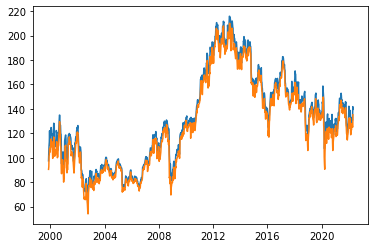

In [62]:
plt.plot(df_USA_stocks['2. high'])
plt.plot(df_USA_stocks['3. low'])

In [64]:
key = 'J03E9G54DQQKK36T'
stock3="AC"
url3= 'https://www.alphavantage.co/query?function=TIME_SERIES_WEEKLY&symbol='+stock3+'&apikey='+key
stock_price3=requests.get(url3)
stock_aircanada=stock_price3.json()
stock_aircanada

{'Meta Data': {'1. Information': 'Weekly Prices (open, high, low, close) and Volumes',
  '2. Symbol': 'AC',
  '3. Last Refreshed': '2022-04-25',
  '4. Time Zone': 'US/Eastern'},
 'Weekly Time Series': {'2022-04-25': {'1. open': '39.4100',
   '2. high': '40.2126',
   '3. low': '38.2000',
   '4. close': '39.5000',
   '5. volume': '7149'},
  '2022-04-22': {'1. open': '38.2000',
   '2. high': '41.0182',
   '3. low': '36.9968',
   '4. close': '39.7600',
   '5. volume': '73740'},
  '2022-04-14': {'1. open': '37.7500',
   '2. high': '39.6390',
   '3. low': '36.5800',
   '4. close': '38.5700',
   '5. volume': '50340'},
  '2022-04-08': {'1. open': '40.8220',
   '2. high': '40.8220',
   '3. low': '36.9700',
   '4. close': '37.5600',
   '5. volume': '44755'},
  '2022-04-01': {'1. open': '41.3500',
   '2. high': '43.0964',
   '3. low': '40.5000',
   '4. close': '40.9700',
   '5. volume': '26885'},
  '2022-03-25': {'1. open': '41.1000',
   '2. high': '41.4894',
   '3. low': '39.6000',
   '4. close'

In [65]:
df3=pd.DataFrame(stock_aircanada['Weekly Time Series']).transpose()

In [66]:
u= df5.rename(columns={'2. high': 'travel'})
u1=u['travel']

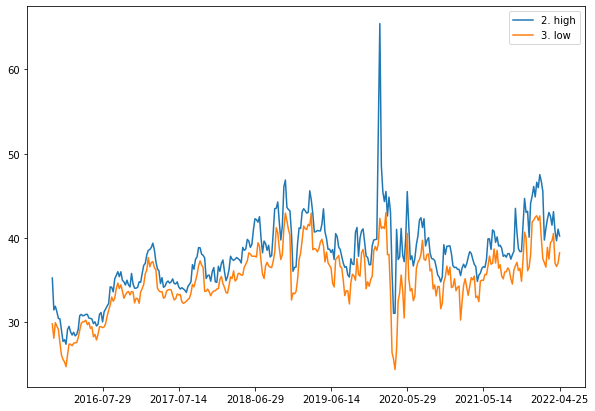

In [67]:
df3=df3.astype(float)
df3[['2. high', '3. low']].plot(figsize = (10,7))
plt.gca().invert_xaxis()
plt.show()

In [69]:
stock4="CIGI"
url4= 'https://www.alphavantage.co/query?function=TIME_SERIES_WEEKLY&symbol='+stock4+'&apikey='+key
stock_price4=requests.get(url4)
stock_cigi=stock_price4.json()
stock_cigi

{'Meta Data': {'1. Information': 'Weekly Prices (open, high, low, close) and Volumes',
  '2. Symbol': 'CIGI',
  '3. Last Refreshed': '2022-04-25',
  '4. Time Zone': 'US/Eastern'},
 'Weekly Time Series': {'2022-04-25': {'1. open': '118.6300',
   '2. high': '120.4100',
   '3. low': '117.5150',
   '4. close': '119.8900',
   '5. volume': '64045'},
  '2022-04-22': {'1. open': '122.2500',
   '2. high': '128.1700',
   '3. low': '119.0800',
   '4. close': '119.1500',
   '5. volume': '349958'},
  '2022-04-14': {'1. open': '121.7000',
   '2. high': '127.4400',
   '3. low': '121.0800',
   '4. close': '122.3100',
   '5. volume': '304075'},
  '2022-04-08': {'1. open': '130.6600',
   '2. high': '132.5600',
   '3. low': '122.1700',
   '4. close': '123.0800',
   '5. volume': '339864'},
  '2022-04-01': {'1. open': '127.7900',
   '2. high': '133.4400',
   '3. low': '127.5600',
   '4. close': '130.6600',
   '5. volume': '390584'},
  '2022-03-25': {'1. open': '130.1200',
   '2. high': '134.2600',
   '3. l

In [70]:
df4=pd.DataFrame(stock_cigi['Weekly Time Series']).transpose()

In [71]:
i= df4.rename(columns={'2. high': 'real estate'})
i1=i['real estate']

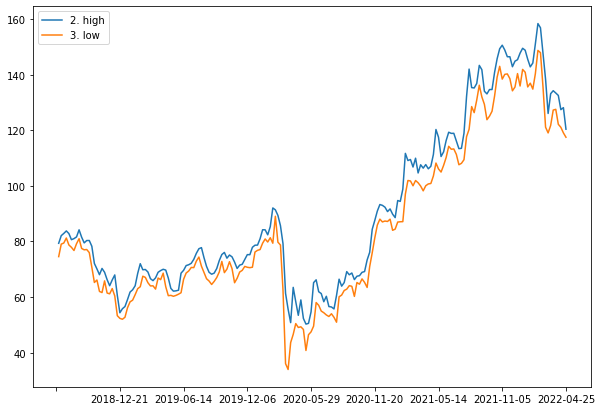

In [72]:
df4=df4.astype(float)
df4[['2. high', '3. low']].head(200).plot(figsize = (10,7))
plt.gca().invert_xaxis()
plt.show()

In [74]:
stock5="GOLD"
url5= 'https://www.alphavantage.co/query?function=TIME_SERIES_WEEKLY&symbol='+stock5+'&apikey='+key
stock_price5=requests.get(url5)
stock_gold=stock_price5.json()
stock_gold

{'Meta Data': {'1. Information': 'Weekly Prices (open, high, low, close) and Volumes',
  '2. Symbol': 'GOLD',
  '3. Last Refreshed': '2022-04-25',
  '4. Time Zone': 'US/Eastern'},
 'Weekly Time Series': {'2022-04-25': {'1. open': '22.7000',
   '2. high': '22.9650',
   '3. low': '22.2200',
   '4. close': '22.7300',
   '5. volume': '32473036'},
  '2022-04-22': {'1. open': '25.5200',
   '2. high': '25.9900',
   '3. low': '23.4800',
   '4. close': '23.7300',
   '5. volume': '98162599'},
  '2022-04-14': {'1. open': '25.7100',
   '2. high': '25.9200',
   '3. low': '24.9000',
   '4. close': '25.2000',
   '5. volume': '61147589'},
  '2022-04-08': {'1. open': '25.0900',
   '2. high': '25.4900',
   '3. low': '24.3300',
   '4. close': '25.4100',
   '5. volume': '82582791'},
  '2022-04-01': {'1. open': '24.1100',
   '2. high': '25.1300',
   '3. low': '23.6100',
   '4. close': '24.9400',
   '5. volume': '81588594'},
  '2022-03-25': {'1. open': '23.9000',
   '2. high': '24.9600',
   '3. low': '23.84

In [75]:
df5=pd.DataFrame(stock_gold['Weekly Time Series']).transpose()
df5

,1. open,2. high,3. low,4. close,5. volume
2022-04-25,22.7000,22.9650,22.2200,22.7300,32473036
2022-04-22,25.5200,25.9900,23.4800,23.7300,98162599
2022-04-14,25.7100,25.9200,24.9000,25.2000,61147589
2022-04-08,25.0900,25.4900,24.3300,25.4100,82582791
2022-04-01,24.1100,25.1300,23.6100,24.9400,81588594
...,...,...,...,...,...
1999-12-10,17.2500,18.4400,17.1900,17.5600,6223500
1999-12-03,18.0600,18.3100,17.3100,17.4400,8455600
1999-11-26,17.8100,19.5600,17.5000,19.3800,9774400
1999-11-19,17.8800,18.6300,17.5000,17.8100,7617200


In [76]:
o= df5.rename(columns={'2. high': 'gold'})
o1=o['gold']

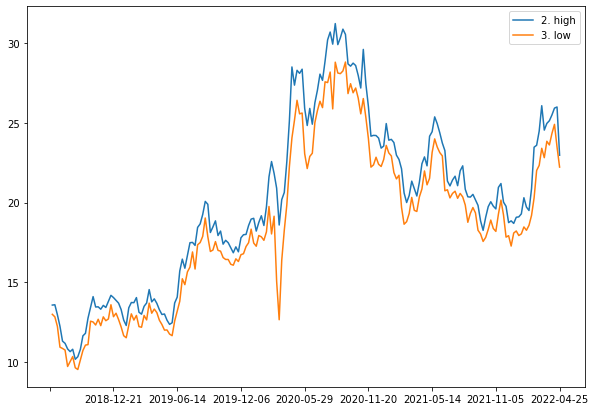

In [77]:
df5=df5.astype(float)
df5[['2. high', '3. low']].head(200).plot(figsize = (10,7))
plt.gca().invert_xaxis()
plt.show()

In [81]:
q=pd.DataFrame(x).transpose()
w=q.drop(['Lat', 'Long','Province/State'], axis=0)
w


,0,1,2,3,4,5,6,7,8,9,...,274,275,276,277,278,279,280,281,282,283
Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4/21/22,178611,274606,265754,41013,99287,11,7567,9060923,422805,97825,...,895775,238401,6465,522056,10533164,656876,535,11818,318984,247383
4/22/22,178638,274737,265761,41013,99287,11,7571,9060923,422814,98760,...,895775,238428,6537,522088,10544324,656876,535,11818,318984,247488
4/23/22,178648,274791,265761,41013,99287,11,7571,9060923,422822,99485,...,895775,238442,6793,522121,10554689,656876,535,11818,318984,247524
4/24/22,178689,274828,265767,41013,99287,11,7571,9060923,422825,99485,...,895775,238469,6840,522176,10563502,656876,535,11818,318984,247524


In [82]:
e=pd.DataFrame(y).transpose()
r=e.drop(['Lat', 'Long','Province/State'], axis=0)
r


,0,1,2,3,4,5,6,7,8,9,...,274,275,276,277,278,279,280,281,282,283
Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4/21/22,7680,3496,6874,153,1900,0,135,128344,8622,49,...,7197,1637,7,5704,42991,5657,0,2148,3974,5467
4/22/22,7680,3496,6874,153,1900,0,135,128344,8622,50,...,7197,1637,12,5705,42998,5657,0,2148,3974,5468
4/23/22,7681,3496,6874,153,1900,0,135,128344,8622,50,...,7197,1637,12,5705,43004,5657,0,2148,3974,5468
4/24/22,7682,3496,6875,153,1900,0,135,128344,8622,50,...,7197,1637,12,5706,43013,5657,0,2149,3974,5468


In [85]:
df_set=w.join(r, lsuffix='_Cases', rsuffix='_Deaths')
display(df_set)

,0_Cases,1_Cases,2_Cases,3_Cases,4_Cases,5_Cases,6_Cases,7_Cases,8_Cases,9_Cases,...,274_Deaths,275_Deaths,276_Deaths,277_Deaths,278_Deaths,279_Deaths,280_Deaths,281_Deaths,282_Deaths,283_Deaths
Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4/21/22,178611,274606,265754,41013,99287,11,7567,9060923,422805,97825,...,7197,1637,7,5704,42991,5657,0,2148,3974,5467
4/22/22,178638,274737,265761,41013,99287,11,7571,9060923,422814,98760,...,7197,1637,12,5705,42998,5657,0,2148,3974,5468
4/23/22,178648,274791,265761,41013,99287,11,7571,9060923,422822,99485,...,7197,1637,12,5705,43004,5657,0,2148,3974,5468
4/24/22,178689,274828,265767,41013,99287,11,7571,9060923,422825,99485,...,7197,1637,12,5706,43013,5657,0,2149,3974,5468


In [90]:
t = df_set.join(u1)
p = t.join(i1)
ds = p.join(o1)
ds.tail(50)

,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,Australia,...,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe,travel,real estate,gold
3/7/22,175000,272250,265297,38620,98806,11,7455,8942888,421401,55321,...,5649,40891,5581,0,2138,3959,5399,NaN,NaN,NaN
3/8/22,175353,272337,265323,38710,98829,11,7455,8949362,421541,56474,...,5650,40977,5583,0,2138,3959,5400,NaN,NaN,NaN
3/9/22,175525,272412,265346,38794,98855,11,7461,8955458,421592,57278,...,5652,41086,5588,0,2138,3960,5400,NaN,NaN,NaN
3/10/22,175893,272479,265366,38794,98855,11,7461,8961595,421714,58021,...,5655,41157,5594,0,2139,3960,5408,NaN,NaN,NaN
3/11/22,175974,272552,265391,38794,98855,11,7466,8967210,421842,58687,...,5655,41228,5603,0,2139,3960,5408,NaN,NaN,NaN
3/12/22,176039,272621,265410,38794,98909,11,7466,8970196,421953,59305,...,5656,41290,5603,0,2139,3960,5412,NaN,NaN,NaN
3/13/22,176201,272663,265432,38794,98927,11,7466,8971432,422004,59881,...,5658,41385,5603,0,2139,3960,5414,NaN,NaN,NaN
3/14/22,176409,272689,265457,38794,98931,11,7466,8976079,422021,60654,...,5658,41477,5616,0,2139,3960,5416,NaN,NaN,NaN
3/15/22,176571,272711,265478,38794,98956,11,7470,8981155,422076,61857,...,5659,41545,5622,0,2139,3960,5416,NaN,NaN,NaN
3/16/22,176743,272804,265496,38794,98985,11,7470,8985836,422155,63148,...,5663,41607,5622,0,2140,3961,5418,NaN,NaN,NaN


In [ ]:
df_set.columns =df_set.iloc[0]
re=df_set.drop(0)
re

In [ ]:
for date in o1.index:
    ts = pd.Timestamp(date)
    newtime= ts.strftime('%Y/%m/%d')
    print(newtime)

In [ ]:
ds=ds.astype(float)
ds['Afghanistan'].plot(figsize = (10,7))
plt.gca().invert_xaxis()
plt.show()